Train size: 60000, iter_per_epoch: 1200.0
Iteration 0    : Train Accuracy: 0.099150, Test Accuracy: 0.100900
Iteration 1200 : Train Accuracy: 0.924467, Test Accuracy: 0.927700
Iteration 2400 : Train Accuracy: 0.945733, Test Accuracy: 0.943600
Iteration 3600 : Train Accuracy: 0.958417, Test Accuracy: 0.955500
Iteration 4800 : Train Accuracy: 0.967950, Test Accuracy: 0.963700
Iteration 6000 : Train Accuracy: 0.972400, Test Accuracy: 0.967000
Iteration 7200 : Train Accuracy: 0.975517, Test Accuracy: 0.969200
Iteration 8400 : Train Accuracy: 0.979233, Test Accuracy: 0.969900
Iteration 9600 : Train Accuracy: 0.981700, Test Accuracy: 0.972300
Iteration 10800: Train Accuracy: 0.984650, Test Accuracy: 0.974500
Iteration 12000: Train Accuracy: 0.986550, Test Accuracy: 0.975600
Iteration 13200: Train Accuracy: 0.988150, Test Accuracy: 0.975800
Iteration 14400: Train Accuracy: 0.989167, Test Accuracy: 0.977100
Iteration 15600: Train Accuracy: 0.989267, Test Accuracy: 0.976100
Iteration 16800: Tra

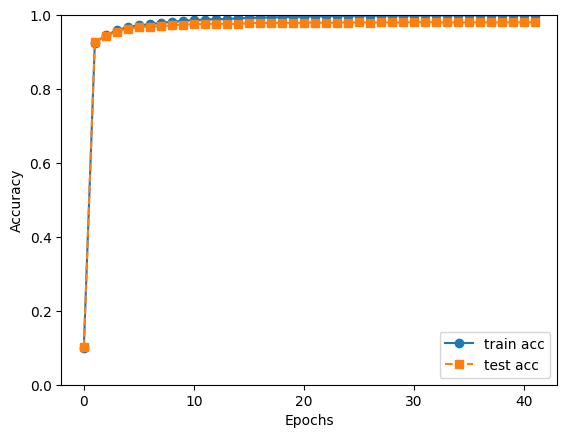

In [96]:
import os, sys

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

sys.path.append(parent_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch03.two_layer_net import TwoLayerNet

# read data
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=195, output_size=10)

# hyperparameters
iters_num = 50000
train_size = x_train.shape[0]
batch_size = 50
learning_rate = 0.5

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
print(f"Train size: {train_size}, iter_per_epoch: {iter_per_epoch}")

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # evaluate gradient
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # update parameters
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]

    # record loss
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # record accuracy per epoch
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)

        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print(
            f"Iteration {i:<5}: Train Accuracy: {train_acc:.6f}, Test Accuracy: {test_acc:.6f}"
        )

markers = {"train": "o", "test": "s"}

x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker=markers["train"], label="train acc")
plt.plot(x, test_acc_list, marker=markers["test"], label="test acc", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.show()